# Урок 8
## Задание 1. Инвертировать изображения

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

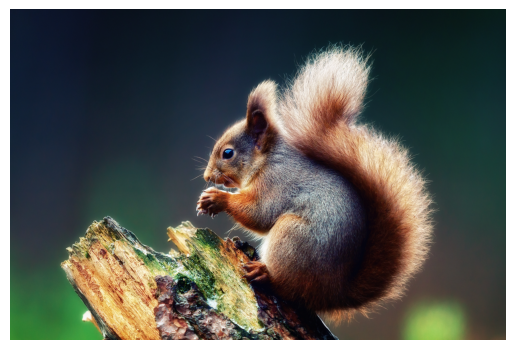

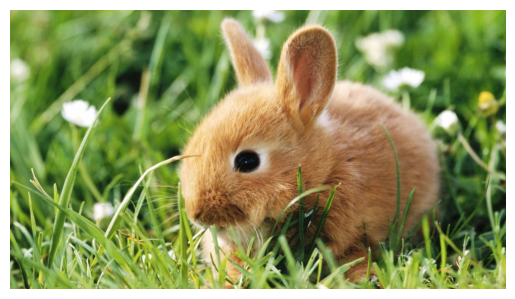

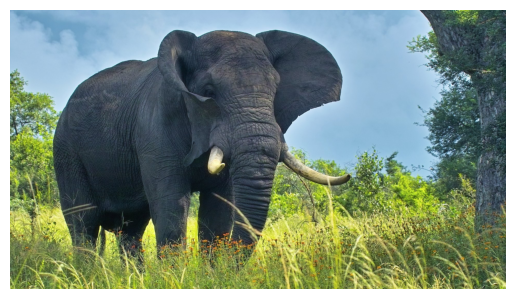

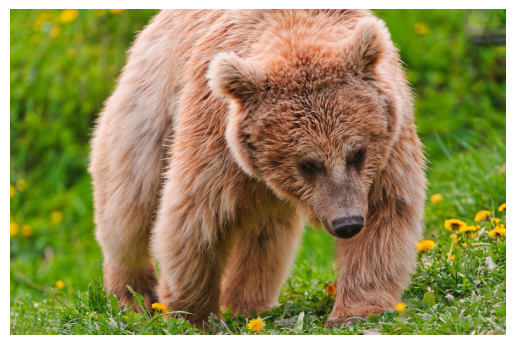

In [149]:
animals = []
folder = 'img'

for file in os.listdir(folder):
    if file.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(folder, file)
        img = mpimg.imread(img_path)
        animals.append(img)

for img in animals:
    plt.imshow(img)
    plt.axis('off')
    plt.show()

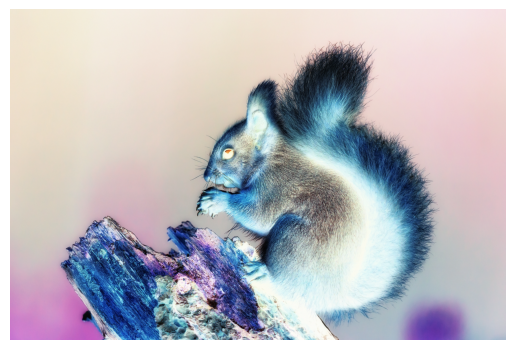

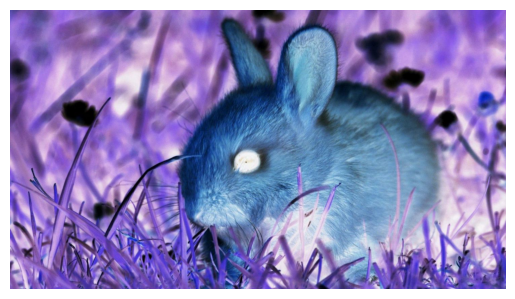

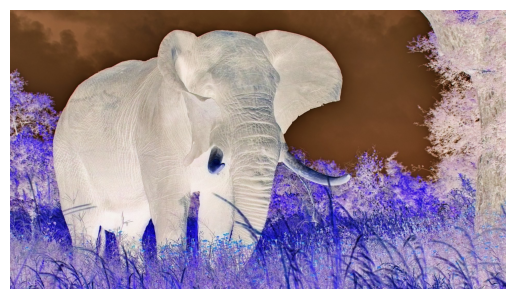

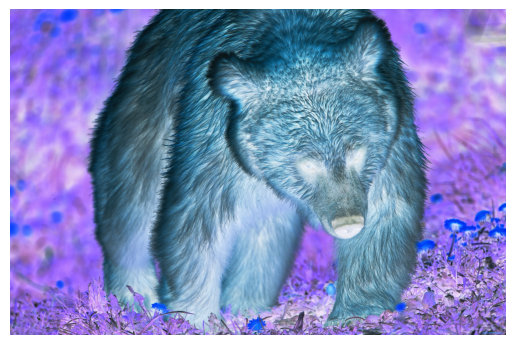

In [37]:
def invert(img):
    return 255 - img

inverted_images = []

for img in animals:
    inverted_img = invert(img)
    inverted_images.append(inverted_img)

for img in inverted_images:
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## Задание 2. Титаник 

In [41]:
import pandas as pd

In [116]:
df = pd.read_csv('titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Пропущенные значения (кол-во)

In [77]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [143]:
print(f'Всего пассажиров: {df.shape[0]}\nИз них выжило: {df[df.Survived == 1].shape[0]} '
      f'({int(df[df.Survived == 1].shape[0] / df.shape[0] * 100)}%)')

Всего пассажиров: 891
Из них выжило: 342 (38%)


## Сколько было женщин и мужчин, сколько из них выжило

In [144]:
stats_by_sex = df.groupby('Sex').agg(
    total=('Survived', 'count'),
    survived=('Survived', 'sum')
)

stats_by_sex

,total,survived
Sex,,
female,314,233
male,577,109


## Средняя выживаемость полов

In [79]:
print(df.groupby('Sex')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


## Выживаемость полов в разрезе возрастных категорий

In [92]:
bins = [0, 10, 20, 50, 60, 90]
labels = ['0-10', '11-20', '21-50', '51-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_survival = df.groupby(['AgeGroup', 'Sex'], observed=True)['Survived'].mean()

age_group_survival

AgeGroup  Sex   
0-10      female    0.633333
          male      0.593750
11-20     female    0.755556
          male      0.122807
21-50     female    0.756098
          male      0.192308
51-60     female    0.888889
          male      0.133333
60+       female    1.000000
          male      0.136364
Name: Survived, dtype: float64

## Выживаемость в разрезе класса

In [78]:
print(df.groupby('Pclass')['Survived'].mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


## Выживаемость в разрезе портов посадки

In [145]:
port_survival = df.groupby('Embarked')['Survived'].mean()
print(port_survival)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


## Пол и классы привязанные к портам посадки

In [123]:
gender_counts = df.groupby(['Embarked', 'Sex'])['Sex'].count()
print(gender_counts)

class_distribution = df.groupby(['Embarked', 'Pclass'])['Pclass'].count()
print(class_distribution)


Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: Sex, dtype: int64
Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: Pclass, dtype: int64


## Стоимость билетов, привязанная к портам посадки

In [136]:
fare_statistics = df.groupby('Embarked').agg({
    'Fare': ['mean', 'median', 'min', 'max', 'count']
})

fare_statistics.columns = ['Average Fare', 'Median Fare', 'Minimum Fare', 'Maximum Fare', 'Ticket Count']
fare_statistics.reset_index(inplace=True)

print(fare_statistics)

  Embarked  Average Fare  Median Fare  Minimum Fare  Maximum Fare  \
0        C     59.954144        29.70        4.0125      512.3292   
1        Q     13.276030         7.75        6.7500       90.0000   
2        S     27.079812        13.00        0.0000      263.0000   

   Ticket Count  
0           168  
1            77  
2           644  


## Семьи

In [139]:
df['LastName'] = df['Name'].apply(lambda x: x.split(',')[0])

grouped = df.groupby(['LastName', 'Ticket'])

for (lastname, ticket), group in grouped:
    
    if len(group) > 1:
        
        print(f"Группа: {lastname}, билет: {ticket}")
        print(group[['Name', 'SibSp', 'Parch', 'Age', 'Ticket', 'Pclass', 'Cabin', 'Embarked', 'Survived']])
        print("\n")

Группа: Abbott, билет: C.A. 2673
                                 Name  SibSp  Parch   Age     Ticket  Pclass  \
279  Abbott, Mrs. Stanton (Rosa Hunt)      1      1  35.0  C.A. 2673       3   
746       Abbott, Mr. Rossmore Edward      1      1  16.0  C.A. 2673       3   

    Cabin Embarked  Survived  
279   NaN        S         1  
746   NaN        S         0  


Группа: Abelson, билет: P/PP 3381
                                      Name  SibSp  Parch   Age     Ticket  \
308                    Abelson, Mr. Samuel      1      0  30.0  P/PP 3381   
874  Abelson, Mrs. Samuel (Hannah Wizosky)      1      0  28.0  P/PP 3381   

     Pclass Cabin Embarked  Survived  
308       2   NaN        C         0  
874       2   NaN        C         1  


Группа: Allison, билет: 113781
                                                Name  SibSp  Parch    Age  \
297                     Allison, Miss. Helen Loraine      1      2   2.00   
305                   Allison, Master. Hudson Trevor      1  